<a href="https://colab.research.google.com/github/DataScience-TeamProject/data/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94_%EB%8B%A8%EC%88%9C%EB%85%B8%EB%AC%B4%20%EC%B7%A8%EC%97%85%EB%B9%84%EC%9E%90%20%EC%99%B8%EA%B5%AD%EC%9D%B8%20%EB%B9%84%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
#csv 파일 불러오기
for_stay = pd.read_csv('법무부_외국인체류데이터_20191231.csv', encoding='cp949')
for_stay.head()

,대륙,국적,성별,D-1(문화예술),D-2(유학),D-3(기술연수),D-4(일반연수),D-5(취재),D-6(종교),D-7(주재),...,E-10(선원취업),F-1(방문동거),F-2(거주),F-3(동반),F-5(영주),F-6(결혼이민),G-1(기타),H-1(관광취업),H-2(방문취업),기타(other)
0,아시아주,한국계중국인,남성,1.0,465.0,80.0,130.0,1.0,1.0,12.0,...,1.0,9474.0,5207.0,18.0,47026.0,6693.0,162.0,NaN,117420.0,5.0
1,아시아주,한국계중국인,여성,1.0,682.0,59.0,112.0,NaN,NaN,1.0,...,NaN,10679.0,5729.0,35.0,41833.0,10683.0,70.0,NaN,75235.0,3.0
2,아시아주,중국,남성,10.0,22044.0,375.0,4651.0,10.0,11.0,246.0,...,2601.0,14275.0,6863.0,551.0,11234.0,4467.0,2779.0,NaN,16.0,272.0
3,아시아주,중국,여성,6.0,37619.0,253.0,5082.0,11.0,28.0,79.0,...,1.0,22374.0,10856.0,1163.0,22213.0,19586.0,1325.0,NaN,17.0,268.0
4,아시아주,베트남,남성,2.0,8120.0,81.0,20420.0,NaN,37.0,26.0,...,8030.0,13180.0,1187.0,474.0,372.0,2691.0,672.0,NaN,NaN,108.0


# **1. 데이터 전처리**

In [4]:
#NaN값 0으로 채우기
for_stay = for_stay.fillna(0)

#대륙, 국적, 성별 칼럼 제거
for_stay = for_stay.drop(['대륙', '국적', '성별'], axis=1)

#값을 정수(int)형으로 변환
for_stay = for_stay.astype(int)

#칼럼명 정제
for_stay.columns = ['문화예술','유학','기술연수','일반연수','취재', '종교', '주재', '기업투자', '무역경영',
              '구직', '교수', '회화강사', '연구', '기술지도', '전문직업', '예술흥행', '특정활동', 
              '비전문취업', '선원취업', '방문동거', '거주', '동반', '영주', '결혼이민', '기타_1', '관광취업', '방문취업', '기타_2']

#[기타_1]과 [기타_2]를 [기타]로 병합
for_stay['기타'] = for_stay['기타_1']+for_stay['기타_2']
for_stay = for_stay.drop(['기타_1', '기타_2'], axis=1)

for_stay.head()

,문화예술,유학,기술연수,일반연수,취재,종교,주재,기업투자,무역경영,구직,...,비전문취업,선원취업,방문동거,거주,동반,영주,결혼이민,관광취업,방문취업,기타
0,1,465,80,130,1,1,12,35,2,0,...,352,1,9474,5207,18,47026,6693,0,117420,167
1,1,682,59,112,0,0,1,19,2,0,...,257,0,10679,5729,35,41833,10683,0,75235,73
2,10,22044,375,4651,10,11,246,764,109,899,...,1989,2601,14275,6863,551,11234,4467,0,16,3051
3,6,37619,253,5082,11,28,79,221,33,1404,...,274,1,22374,10856,1163,22213,19586,0,17,1593
4,2,8120,81,20420,0,37,26,20,5,271,...,32979,8030,13180,1187,474,372,2691,0,0,780


In [5]:
#칼럼명 확인
for_stay.columns

Index(['문화예술', '유학', '기술연수', '일반연수', '취재', '종교', '주재', '기업투자', '무역경영', '구직',
       '교수', '회화강사', '연구', '기술지도', '전문직업', '예술흥행', '특정활동', '비전문취업', '선원취업',
       '방문동거', '거주', '동반', '영주', '결혼이민', '관광취업', '방문취업', '기타'],
      dtype='object')

In [6]:
#리스트에 칼럼 저장
columns = ['문화예술', '유학', '기술연수', '일반연수', '취재', '종교', '주재', '기업투자', '무역경영', '구직',
       '교수', '회화강사', '연구', '기술지도', '전문직업', '예술흥행', '특정활동', '비전문취업', '선원취업',
       '방문동거', '거주', '동반', '영주', '결혼이민', '관광취업', '방문취업', '기타']

#각 칼럼의 합계 도출
sum = for_stay[columns].sum()
sum

문화예술         59
유학       117415
기술연수       1280
일반연수      59526
취재           89
종교         1523
주재         1375
기업투자       5875
무역경영       2320
구직         5412
교수         2183
회화강사      13798
연구         3109
기술지도        219
전문직업        606
예술흥행       3231
특정활동      20997
비전문취업    270751
선원취업      17131
방문동거     120962
거주        43403
동반        22414
영주       153038
결혼이민     129200
관광취업       2948
방문취업     223513
기타        49430
dtype: int64

In [7]:
#새 데이터프레임 생성
for_stay_new = pd.DataFrame()

#칼럼명 지정, sum으로 값 지정
for_stay_new['응답수'] = sum

#인덱스를 '체류요인'이라는 칼럼으로 변경
for_stay_new = for_stay_new.rename_axis('체류요인').reset_index()
for_stay_new.head(10)

,체류요인,응답수
0,문화예술,59
1,유학,117415
2,기술연수,1280
3,일반연수,59526
4,취재,89
5,종교,1523
6,주재,1375
7,기업투자,5875
8,무역경영,2320
9,구직,5412


In [8]:
#비자 종류별 카테고리 칼럼 생성
for_stay_new = for_stay_new.assign(비자분류 = ['취업불가비자',  '취업불가비자',  '취업불가비자', '취업불가비자',
                            '취업불가비자', '취업불가비자', '취업불가비자', '취업불가비자',
                            '취업불가비자','전문인력 취업비자', '전문인력 취업비자', '전문인력 취업비자',
                            '전문인력 취업비자', '전문인력 취업비자', '전문인력 취업비자', '전문인력 취업비자',
                            '전문인력 취업비자','단순노무 취업비자', '단순노무 취업비자', '취업불가비자', 
                            '업무무관 취업가능비자', '취업불가비자', '업무무관 취업가능비자',
                            '업무무관 취업가능비자', '단순노무 취업비자', '단순노무 취업비자', '단순노무 취업비자'])

#체류요인 기준 오름차순으로 정렬
for_stay_new = for_stay_new.sort_values(by = ['비자분류'], ascending = [True])

for_stay_new

,체류요인,응답수,비자분류
26,기타,49430,단순노무 취업비자
24,관광취업,2948,단순노무 취업비자
18,선원취업,17131,단순노무 취업비자
17,비전문취업,270751,단순노무 취업비자
25,방문취업,223513,단순노무 취업비자
23,결혼이민,129200,업무무관 취업가능비자
22,영주,153038,업무무관 취업가능비자
20,거주,43403,업무무관 취업가능비자
16,특정활동,20997,전문인력 취업비자
15,예술흥행,3231,전문인력 취업비자


# **2. 데이터 시각화**

1) 모든 체류요인

In [9]:
#그래프 크기 설정
plt.rcParams['figure.figsize'] = (12, 10)

#폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [10]:
cmap = plt.get_cmap('Purples')
colors = cmap([1,20,30,40,50,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,140,150,160,170,180,200])

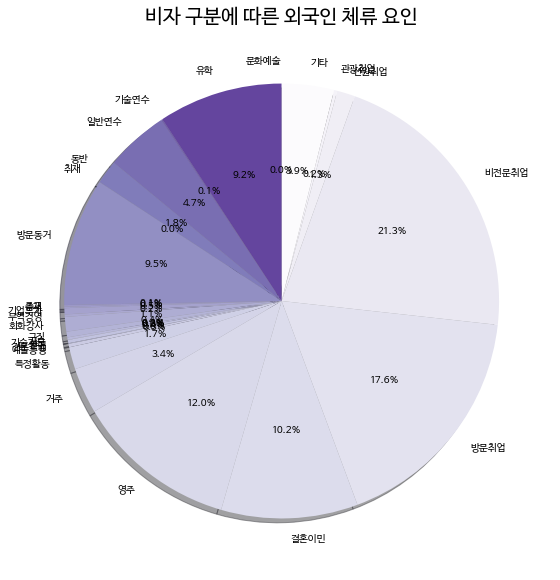

In [11]:
#원그래프 그리기
plt.title('비자 구분에 따른 외국인 체류 요인',fontsize = 20)
plt.pie(for_stay_new['응답수'], labels = for_stay_new['체류요인'], autopct = '%1.1f%%',colors = colors,
        startangle=90, shadow=True, counterclock=False)

plt.show()

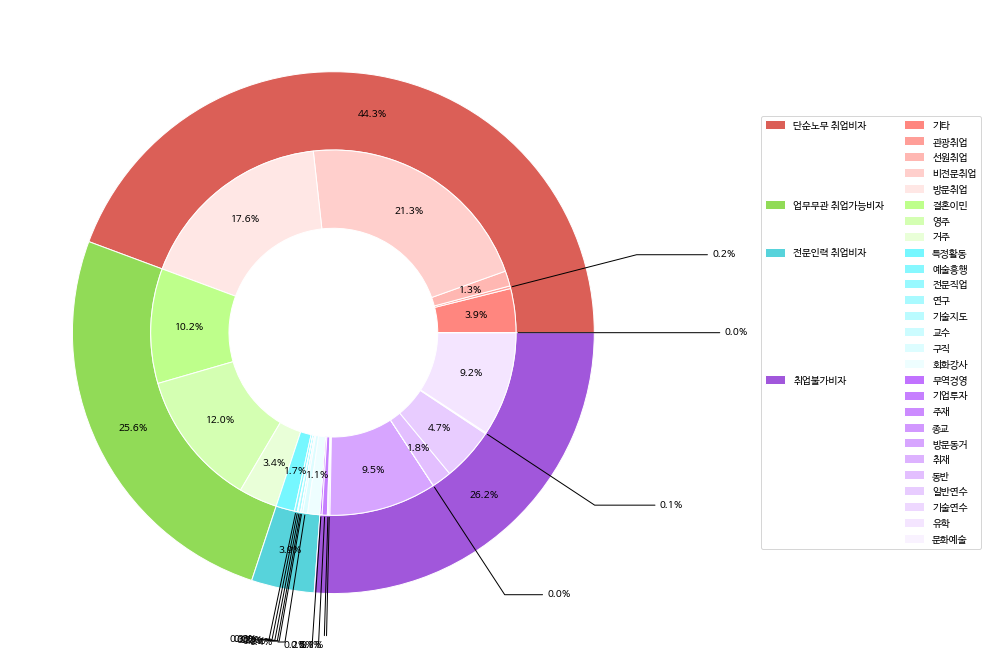

In [44]:
import matplotlib.colors as mcl
import matplotlib.patches as mpt
import seaborn as sns

freq_col = '응답수'
outer_col = '비자분류'
inner_col = '체류요인'

size = 0.3
threshold = 1

color = sns.color_palette('hls', len(for_stay_new[outer_col].unique()))

summary = for_stay_new.groupby(outer_col)[freq_col].sum().reset_index()
outer_data = summary[freq_col]
inner_data = []
for s in summary[outer_col]:
  inner_data += list(for_stay_new.query('{0}==@s'.format(outer_col))[freq_col])

fig = plt.figure(figsize=(12, 12))
fig.set_facecolor('white')
ax = fig.add_subplot() ## 프레임 생성
 
## 바깥쪽 도넛 조각 차트 출력
out_pie = ax.pie(outer_data,
             radius=1,
             colors=color,
             wedgeprops=dict(width=size,edgecolor='w'))
 
## 바깥쪽 도넛 백분율 텍스트 출력
total = np.sum(outer_data) ## 바깥쪽 빈도수의 총합
 
sum_pct = 0 ## 백분율 초기값
 
for i in range(len(outer_data)):
    ang1, ang2 = out_pie[0][i].theta1, out_pie[0][i].theta2 ## 각1, 각2
    out_r = out_pie[0][i].r ## 원의 반지름
    
    x = ((2*out_r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 바깥쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2*out_r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 바깥쪽 도넛 조각의 중앙쪽 y좌표
    
    if i < len(outer_data) - 1:
        sum_pct += float(f'{outer_data[i]/total*100:.1f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{outer_data[i]/total*100:.1f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.1f}%',ha='center',va='center')
 
outer_color = [] ## 바깥쪽 도넛 조각의 색상을 hsv 컬러로 담을 리스트
for p in out_pie[0]:
    outer_color.append(p.get_facecolor()) ## 바깥쪽 도넛 조각을 rgb 컬러로 가져온다.
outer_color_hsv = [mcl.rgb_to_hsv(x[:3]) for x in outer_color] ## rgb를 hsv로 바꾼다.
outer_color_hsv = [(x[0],x[1],1) for x in outer_color_hsv] ## 색상 채도만 가져오고 명도는 1로 고정한다.
 
inner_color = [] ## 안쪽 도넛 조각의 색상을 담는 리스트
for i, g in enumerate(summary[outer_col]):
    num_sub_group = len(for_stay_new.query('{0}==@g'.format(outer_col))) ## 하위 그룹 개수
    jump = outer_color_hsv[i][1]/(num_sub_group+1) ## 채도 등분점 간격
    temp_list = []
    temp_s = np.arange(0,outer_color_hsv[i][1],jump) 
    temp_s = temp_s[1:] ## 채도 등분점
    for t in temp_s:
        h = outer_color_hsv[i][0] ## 색상
        s = t ## 채도
        v = outer_color_hsv[i][2] ## 명도
        temp_list.append((h,s,v))
    inner_color += temp_list[::-1] ## 순서를 바꿈
    
inner_color = [mcl.hsv_to_rgb(x) for x in inner_color] #3 hsv를 다시 rgb로 바꾼다.
 
## 안쪽 도넛 차트 출력
inner_pie = ax.pie(inner_data,
       radius=1-size,
       colors=inner_color,
       wedgeprops=dict(width=size,edgecolor='w'))
 
## 안쪽 도넛 백분율 텍스트 출력
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
inner_sum_pct = 0 ## 안쪽 도넛 백분율 초기값
for i in range(len(inner_data)):
    ang1, ang2 = inner_pie[0][i].theta1, inner_pie[0][i].theta2 ## 안쪽 각1, 안쪽 각2
    r = inner_pie[0][i].r ## 안쪽 도넛의 반지름
    
    x = ((2*r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 안쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2*r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 안쪽 도넛 조각의 중앙쪽 y좌표
    
    if i < len(inner_data) - 1:
        inner_sum_pct += float(f'{inner_data[i]/total*100:.1f}') ## 백분율을 누적한다.
        text = f'{inner_data[i]/total*100:.1f}%' ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        text = f'{100-inner_sum_pct:.1f}%'
        
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if inner_data[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = out_r*np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = out_r*np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=((out_r-size)*x, (out_r-size)*y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = ((2*r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 텍스트 x좌표
        y = ((2*r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center')
 
## 범례
## 범례는 2줄로 만든다. 왼쪽 줄에는 상위 그룹을 표시하고 오른쪽 줄에는 하위 그룹을 표시한다.
inner_pie_index = -1 ## 안쪽 도넛 차트의 데이터에 접근할 인덱스 초기값
right_legend_patches = [] ## 오른쪽 범례 칼럼에 들어가는 요소
left_legend_patches = [] ## 왼쪽 범례 칼럼에 들어가는 요소
right_labels = [] ## 오른쪽 범례 칼럼에 들어가는 라벨
left_labels = [] ## 왼쪽 범례 칼러에 들어가는 라벨
for i in range(len(outer_data)):
    left_legend_patches.append(out_pie[0][i])
    
    outer_label = summary[outer_col][i] ## 바깥쪽 도넛 차트 라벨
 
    left_labels.append(outer_label)
    temp_data = for_stay_new.query('{0}==@outer_label'.format(outer_col)) ## 바깥쪽 라벨에 대응하는 안쪽 도넛 데이터
    temp_data = temp_data.reset_index(drop=True)
    
    temp_number = len(temp_data)-1
    
    ## 오른쪽 범례 개수와 맞추기 위해 빈 범례를 만듬
    for k in range(temp_number):
        rect = mpt.Rectangle((0,0),1,1.1,facecolor='None')
        left_legend_patches.append(rect)
        left_labels.append('')
    
    ## 오른쪽 범례 칼럼을 만든다.
    for j in range(len(temp_data)):
        inner_pie_index += 1
        
        right_legend_patches.append(inner_pie[0][inner_pie_index])
        right_labels.append(temp_data[inner_col][j])
        
    ## 범례 요소와 라벨을 합친다.
    legend_patches = left_legend_patches+right_legend_patches
    labels = left_labels + right_labels
        
## 범례 출력
plt.legend(legend_patches,
           labels,
           ncol=2,
           loc='right',
           handleheight=1, ## 범례 줄 맞춤
           labelspacing=0.5, ## 범례 줄 간격
           bbox_to_anchor=(1.5,0.5))
 
plt.show()

2) 체류요인이 '노동'인 항목 강조

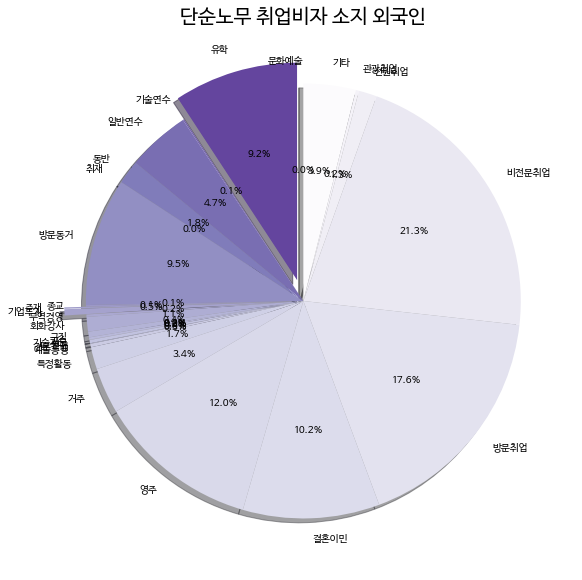

In [19]:
#원그래프 그리기
plt.title('단순노무 취업비자 소지 외국인',fontsize = 20)
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0.1,0]

plt.pie(for_stay_new['응답수'], labels = for_stay_new['체류요인'], autopct = '%1.1f%%',colors = colors,
        startangle=90, explode=explode, shadow=True, counterclock=False)

#plt.show()